# Exercise 3b: Masking

## Aim: Learn to mask data in xarray

Find the teaching material here: https://tutorial.xarray.dev/intermediate/indexing/boolean-masking-indexing.html

### Issues covered: 
- Create re-usable masks for data
- Plot masked data

Q1. For masking, we're back to using our ocean dataset. Load it now from `../data/xbhubo.pgc0apr.nc`.

In [1]:
import xarray as xr

ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
ds

<xarray.Dataset> Size: 13MB
Dimensions:      (longitude: 288, latitude: 144, depth: 20, t: 1,
                  longitude_1: 288, latitude_1: 143)
Coordinates:
  * longitude    (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude     (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
  * depth        (depth) float32 80B 5.0 15.0 25.0 ... 4.577e+03 5.192e+03
  * t            (t) object 8B 1920-04-16 00:00:00
  * longitude_1  (longitude_1) float32 1kB 0.625 1.875 3.125 ... 358.1 359.4
  * latitude_1   (latitude_1) float32 572B -88.75 -87.5 -86.25 ... 87.5 88.75
Data variables:
    temp         (t, depth, latitude, longitude) float32 3MB ...
    salinity     (t, depth, latitude, longitude) float32 3MB ...
    ucurr        (t, depth, latitude_1, longitude_1) float32 3MB ...
    vcurr        (t, depth, latitude_1, longitude_1) float32 3MB ...
Attributes:
    history:      Tue Sep 12 11:49:35 BST 2006 - CONVSH V1.91 16-February-2006
    Conventions:  CF-1.0

Q2. Determine which grid cells sea surface temperaturevis more than the mean.

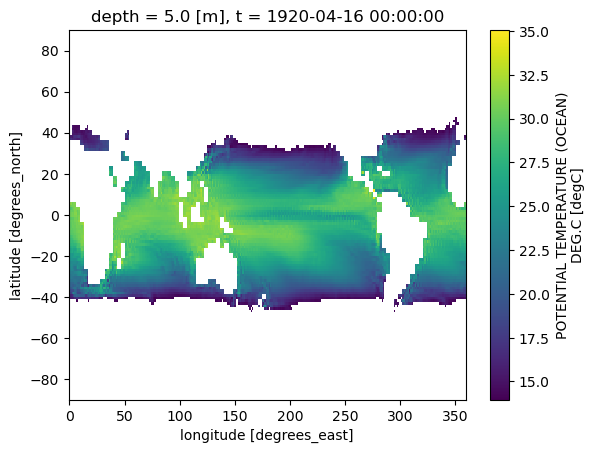

In [3]:
da_temp = ds['temp']
sst = ds.sel(depth=0, method='nearest')
sst.temp.where(sst.temp > sst.temp.mean()).plot()

Q3. Combine this with another .where() lookup to show only cells where the temperature is more than the mean and salinity is more than the mean.

<xarray.DataArray 'temp' (t: 1, latitude: 144, longitude: 288)> Size: 166kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 144, 288), dtype=float32)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
    depth      float32 4B 5.0
  * t          (t) object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

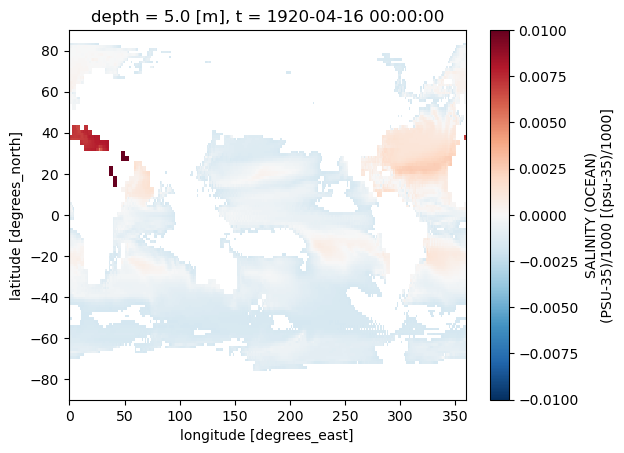

In [9]:
sst.temp.where(sst.temp > sst.temp.mean()).where(sst.salinity.where(sst.salinity > sst.salinity.mean()).plot())

Q4. Masks are just boolean arrays. Create a re-usuable mask for the temperature and sst criteia above, and a combined one.

Q5. Use this mask to make the same temperature plot, and a similar one for sst.